In [38]:
import numpy as np
import pandas as pd
import re,math
import matplotlib.pyplot as plt
from scipy.optimize import linprog


np.set_printoptions(suppress=True)
data1 = pd.read_csv(r'BCHAIN-MKPRU.csv') # B
data2 = pd.read_csv(r'LBMA-GOLD.csv') # G

r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [39]:
# 线性插值填充
data2.interpolate(method='linear', limit_direction='backward', axis=0, inplace = True)

In [40]:
def amplitude(list_1): # 涨幅跌幅计算函数
    x1 = list_1.copy()[1:]
    x2 = list_1.copy()[:-1]
    y = (x1 - x2)/x2
    return y


In [41]:

# 比特币日涨幅
day_b_amp = amplitude(np.array(data1["Value"]))
day_b_amp

array([-0.01927129,  0.00205029, -0.00343744, ..., -0.11139939,
       -0.01561211,  0.00630035])

In [42]:
# 黄金日涨幅
day_amp = amplitude(np.array(data2["USD (PM)"]))
day_amp

array([-0.0007172 , -0.00143542, -0.00828447, ..., -0.00896152,
        0.0012598 ,  0.00355096])

No handles with labels found to put in legend.


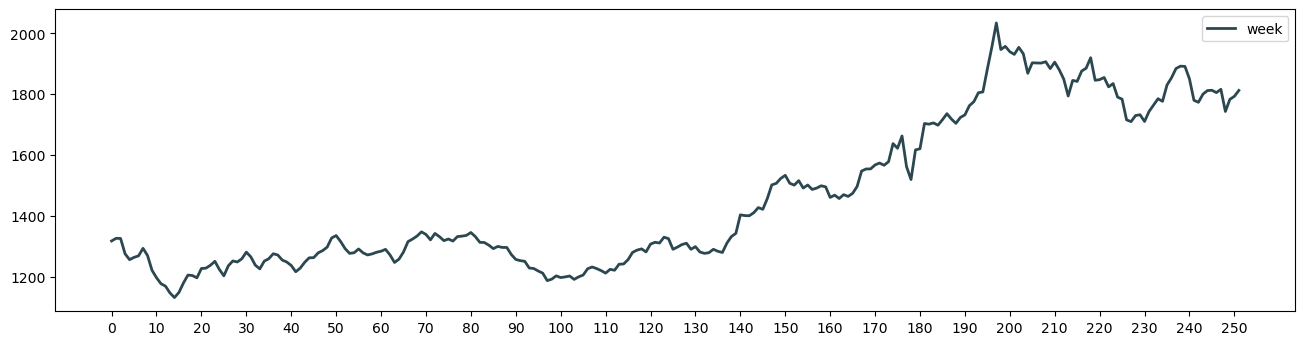

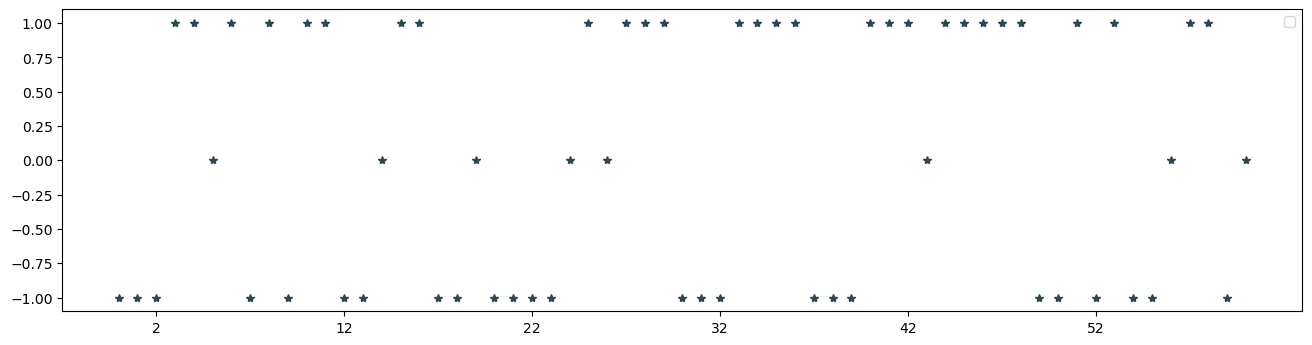

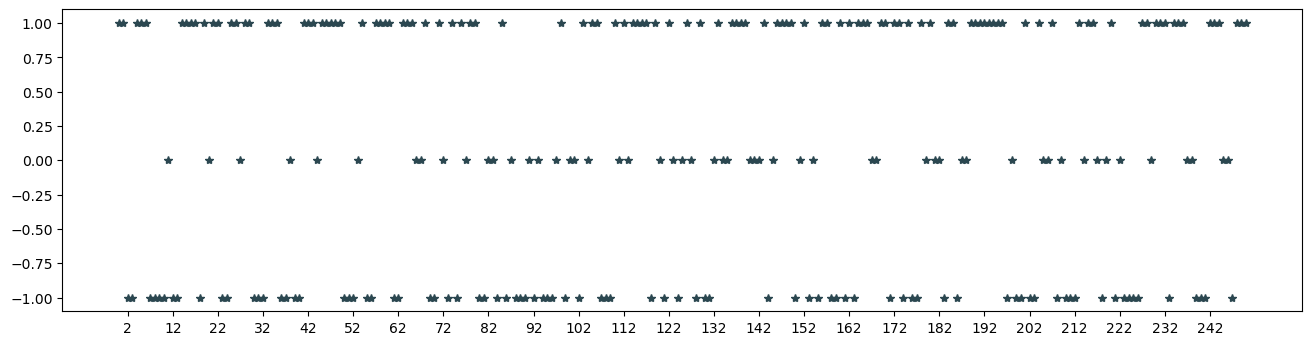

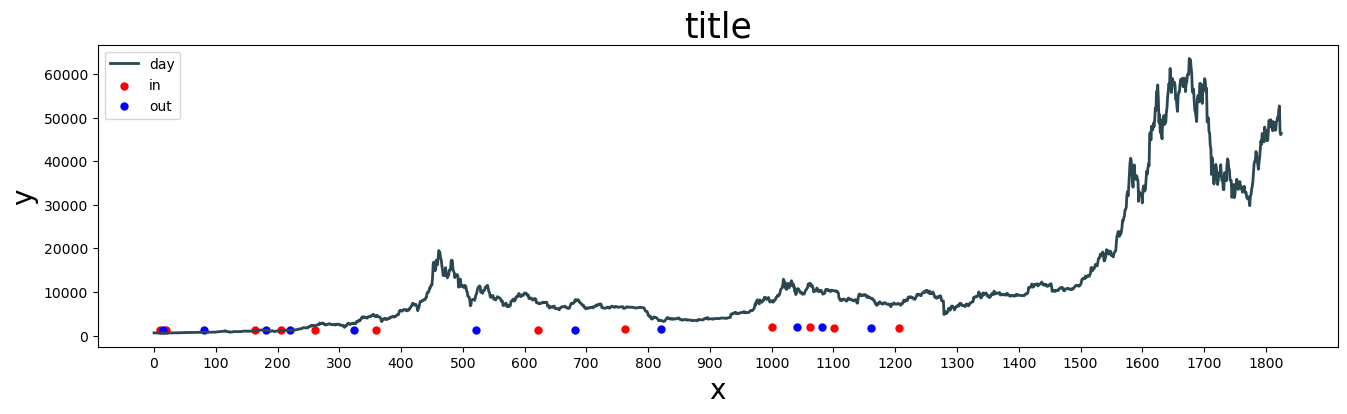

In [43]:
short_item = 5
long_item = 4
# def gold(short_item, long_item,score):
# 周黄金平均值
count = 1
temp3 = []
while True:
    tp = data2.iloc[short_item*(count-1): short_item*count]["USD (PM)"].mean()
    count+= 1
    temp3.append(tp)
    if count >= len(data2)/short_item:
        break
temp3_df = pd.DataFrame(temp3) # 252周的金价
# 周平均金价图
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = temp3_df.index
y = temp3_df.values
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='week' )
ax.set_xticks( range(0,len(x),10))
ax.legend( loc=0, frameon=True )











# 长期(20天)
count = 1
temp4_max = [] # 周高位点
temp4_min = [] # 周低位点
while True:
    tp_max = max(temp3[(count-1)*long_item:count*long_item])
    tp_min = min(temp3[(count-1)*long_item:count*long_item])
    temp4_max.append(tp_max)
    temp4_min.append(tp_min)
    count+=1
    if count >= len(temp3)/long_item:
        break
temp4_max_h = amplitude(np.array(temp4_max)) # 周高位点
temp4_min_l = amplitude(np.array(temp4_min)) # 周低位点
#周趋势(同增同减同趋势，不同则未知)
tptp = []
for i,j in zip(temp4_max_h, temp4_min_l):
    if i > 0 and j > 0:
        tptp.append(1)
    elif i < 0 and j < 0:
        tptp.append(-1)
    else:
        tptp.append(0)
tptp_w_g = pd.DataFrame(tptp) # 第二周开始的61周涨跌幅度表 -1跌+1涨
#周趋势图(长期)
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = tptp_w_g.index
y = tptp_w_g.values
plot = ax.plot( x, y,"r*", color=dt_hex )
ax.set_xticks( range(2,len(x),10))
ax.legend( loc=0, frameon=True )
plt.show()









# # (15天)
# count = 1
# temp5_max = []
# temp5_min = []
# temp5_max_index = []
# temp5_min_index = []
# while True:
#     tp_max = max(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
#     tp_min = min(np.array(data2["USD (PM)"])[(count-1)*15:count*15])
#     temp5_max_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_max))
#     temp5_min_index.append((count-1)*15+list(np.array(data2["USD (PM)"])[(count-1)*15:count*15]).index(tp_min))
#     temp5_max.append(tp_max)
#     temp5_min.append(tp_min)
#     count+=1
#     if count >= len(data2)/15:
#         break
# temp5_max_h = amplitude(np.array(temp5_max))
# temp5_min_l = amplitude(np.array(temp5_min))
# #天趋势
# tptp = []
# temp5_max_value = []
# temp5_min_value = []
# temp5_max_index_real = []
# temp5_min_index_real = []
# count = 0
# for i,j in zip(temp5_max_h, temp5_min_l):
#     if i > 0 and j > 0:
#         tptp.append(1)
#         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
#         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
#         temp5_max_index_real.append(temp5_max_index[count])
#         temp5_min_index_real.append(temp5_min_index[count])
#     elif i < 0 and j < 0:
#         tptp.append(-1)
#         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
#         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
#         temp5_max_index_real.append(temp5_max_index[count])
#         temp5_min_index_real.append(temp5_min_index[count])
#     else:
#         tptp.append(0)
#     count += 1
# tptp_d = pd.DataFrame(tptp)
# # 点图
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = tptp_d.index
# y = tptp_d.values
# plot = ax.plot( x, y,"r*", color=dt_hex )
# ax.set_xticks( range(2,len(x),10))
# plt.show()
# # 折线描点图
# fig = plt.figure( figsize=(16,4), dpi=100)
# ax = fig.add_subplot(1,1,1)
# x = np.array(data2.index)[0:200]
# y = np.array(data2["USD (PM)"])[0:200]
# plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
# plt.scatter(temp5_max_index_real[0:12], temp5_max_value[0:12], s=25, c='r') 
# plt.scatter(temp5_min_index_real[0:12], temp5_min_value[0:12], s=25, c='b') 
# ax.set_xticks( range(0,len(x),30))
# plt.xlabel('x',fontsize=20)
# plt.ylabel('y',fontsize=20)
# plt.title('title',fontsize=25)
# ax.legend( loc=0, frameon=True )
# plt.savefig('天周期点图.png',dpi=600)
# plt.show()





















# 5天(一周趋势)
count = 1
temp5_max = []
temp5_min = []
# temp5_max_index = []
# temp5_min_index = []
while True:
    tp_max = max(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
    tp_min = min(np.array(data2["USD (PM)"])[(count-1)*short_item:count*short_item])
#     temp5_max_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_max))
#     temp5_min_index.append((count-1)*5+list(np.array(data2["USD (PM)"])[(count-1)*5:count*5]).index(tp_min))
    temp5_max.append(tp_max)
    temp5_min.append(tp_min)
    count+=1
    if count >= len(data2)/short_item:
        break
temp5_max_h = amplitude(np.array(temp5_max))
temp5_min_l = amplitude(np.array(temp5_min))
#
tptp = []
# temp5_max_value = []
# temp5_min_value = []
# temp5_max_index_real = []
# temp5_min_index_real = []
count = 0
for i,j in zip(temp5_max_h, temp5_min_l):
    if i > 0 and j > 0:
        tptp.append(1)
#         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
#         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
#         temp5_max_index_real.append(temp5_max_index[count])
#         temp5_min_index_real.append(temp5_min_index[count])
    elif i < 0 and j < 0:
        tptp.append(-1)
#         temp5_max_value.append(np.array(data2.loc[[temp5_max_index[count]],["USD (PM)"]])[0])
#         temp5_min_value.append(np.array(data2.loc[[temp5_min_index[count]],["USD (PM)"]])[0])
#         temp5_max_index_real.append(temp5_max_index[count])
#         temp5_min_index_real.append(temp5_min_index[count])
    else:
        tptp.append(0)
    count += 1
tptp_5 = pd.DataFrame(tptp)

fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = tptp_5.index
y = tptp_5.values
plot = ax.plot( x, y,"r*", color=dt_hex )
ax.set_xticks( range(2,len(x),10))
plt.show()














# 第一个20天
# 买入-1 卖出+1
status = 0 # 上一周的涨跌
#day_amp  黄金日涨幅
status_dict = [] # (日期，买入还是卖出)
day = 0
for i in range(long_item):
    if i == 0: # 第二周
        status_first_5 = np.array(tptp_w_g)[0][0]
        if status_first_5 < 0:
            status = -1 # 跌
        elif status_first_5 > 0:
            status = 1 # 涨
        else:
            status = 0 
    else: # 第三周以后20天以内
        for j in range(short_item):
            day = short_item*i+j+short_item-1
            if status_dict == []: # 没有任何买入时
                if status == 1:
                    status = np.array(tptp_w_g)[i-1][0]
                    continue
                elif status == -1 and day_amp[day-1] > 0:
                    status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                    status = np.array(tptp_w_g)[i-1][0]
                    break
            else: # 有买入后
                #  上周涨跌判断      本周每日涨跌幅        上笔交易买卖情况   
                if status == -1 and day_amp[day-1] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                    status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                    status = np.array(tptp_w_g)[i-1][0]
                    break
                elif status == -1 and day_amp[day-1] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                    status_dict.append((day, 1, np.array(data2)[day][1])) # 卖出
                    status = np.array(tptp_w_g)[i-1][0]
                    break
# status_dict

















# 第二个月以及后面
for k in range(len(tptp_w_g)):
    if np.array(tptp_w_g)[k][0] == 0:
        status = np.array(tptp_w_g)[k-1][0]
    else:
        status = np.array(tptp_w_g)[k][0]
    for i in range(long_item):
        for j in range(short_item):
            day = long_item*short_item*(k+1)+short_item*i+j
            if status_dict == []: # 前期无交易
                if status == -1 and day_amp[day-1] > 0: # 上一笔是卖出才能买入或无上一笔可买入
                    status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                    status = np.array(tptp_w_g)[i-1][0]
                    break
                elif status == 1 and day_amp[day-1] < 0: # 上一笔是买入才能卖出，无上一笔的不能卖
                    status = np.array(tptp_w_g)[i-1][0]
                    continue
            else: # 前期有交易
                # 跌幅超过10%交易避免赔本
                if status == 1 and ((np.array(data2)[day][1]-status_dict[-1][-1])/status_dict[-1][-1]) <= -0.1 and status_dict[-1][1] <= 0:
                    status_dict.append((day, -1, np.array(data2)[day][1])) # 卖出
                    break
                if status == -1 and day_amp[day-1] > 0 and status_dict[-1][1] >= 0: # 上一笔是卖出才能买入
                    status_dict.append((day, -1, np.array(data2)[day][1])) # 买入
                    status = np.array(tptp_w_g)[i-1][0]
                    break
                elif status == 1 and day_amp[day-1] < 0 and status_dict[-1][1] <= 0: # 上一笔是买入才能卖出
                    status_dict.append((day, 1, np.array(data2)[day][1])) # 卖出
                    status = np.array(tptp_w_g)[i-1][0]
                    break
# status_dict







# 保存 交易日期 交易情况 交易当日金价
temp6 = []
temp6_in_index = []
temp6_in_value = []
temp6_out_index = []
temp6_out_value = []
for i in status_dict:
    temp6.append([i[0], i[1], np.array(data2)[i[0]][1]])
    if i[1] == -1:
        temp6_in_index.append(i[0])
        temp6_in_value.append(i[2])
    elif i[1] == 1:
        temp6_out_index.append(i[0])
        temp6_out_value.append(i[2])
output1 = pd.DataFrame(temp6, columns=["Date", "process", "price"])
# output1
    

# # 折线描点图
temp9_in_index = []
temp9_in_value = []
temp9_out_index = []
temp9_out_value = []
for i in status_dict:
    if i[1] == -1:
        temp9_in_index.append(i[0])
        temp9_in_value.append(i[2])
    elif i[1] == 1:
        temp9_out_index.append(i[0])
        temp9_out_value.append(i[2])
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = np.array(data1.index)
y = np.array(data1["Value"])
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='day' )
plt.scatter(temp9_in_index, temp9_in_value, s=25, c='r',label='in') 
plt.scatter(temp9_out_index, temp9_out_value, s=25, c='b',label='out') 
ax.set_xticks( range(0,len(x),100))
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('title',fontsize=25)
ax.legend( loc=0, frameon=True )
# plt.savefig('比特币交易图.png',dpi=600)
plt.show()
